In [2]:
import numpy as np 
import pandas as pd 
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt 

import warnings

warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv("labels_train.csv")
data = shuffle(data)
data.head()

,frame,xmin,xmax,ymin,ymax,class_id
100356,1479503192293323354.jpg,382,390,133,162,3
7789,1478020651204740906.jpg,74,87,128,152,4
4957,1478020453697229692.jpg,206,218,143,155,1
112568,1479504569375272775.jpg,269,282,137,154,1
81698,1479500857128342806.jpg,168,176,137,144,1


In [4]:
classes = data["class_id"].unique()
print(classes)

[3 4 1 5 2]


In [14]:
labels = {1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

# Model

In [15]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os 
import pathlib

In [16]:
model = YOLO("yolov8m.pt")

100%|██████████████████████████████████████████████████████████████████████████████| 49.7M/49.7M [00:53<00:00, 968kB/s]


In [19]:
results = model.predict(source="1478019956680248165.jpg", save=True, conf=0.2,iou=0.5)


image 1/1 C:\Users\dell\1478019956680248165.jpg: 416x640 1 car, 1 truck, 1051.5ms
Speed: 10.0ms preprocess, 1051.5ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


In [20]:
result = results[0]

box = result.boxes[0]

In [21]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [22]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()

print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10047912597656]
Probability: 0.7161703109741211


In [23]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [24]:
results1 = model.predict(source="1478020211690815798.jpg", save=True, conf=0.2,iou=0.5)

results = results1[0]


image 1/1 C:\Users\dell\1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 1086.0ms
Speed: 27.9ms preprocess, 1086.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


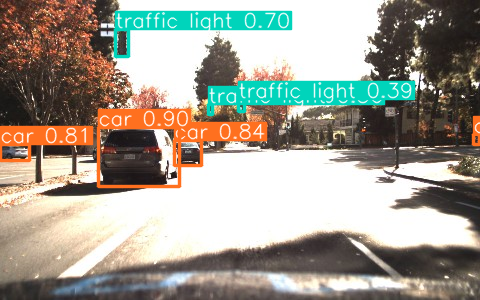

In [25]:
plot = results1[0].plot()

plot = cv2.cvtColor(plot,cv2.COLOR_BGR2RGB)

display(Image.fromarray(plot))

In [35]:
results_x = model.predict(source="1478019956680248165.jpg",save=True, conf=0.2,iou=0.5)


image 1/1 C:\Users\dell\1478019956680248165.jpg: 416x640 1 car, 1 truck, 1010.6ms
Speed: 16.7ms preprocess, 1010.6ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


In [39]:
result_new = results_x[0]

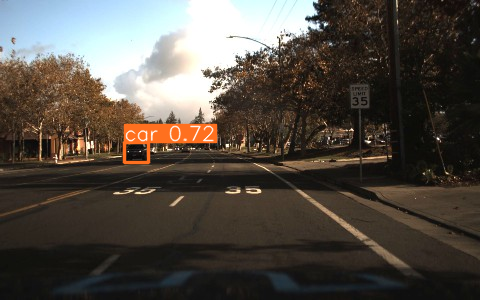

In [41]:
res_plot = result_new[0].plot()
res_plot = cv2.cvtColor(res_plot,cv2.COLOR_BGR2RGB)
display(Image.fromarray(res_plot))

In [30]:
new_results=model.predict(source="1478019977188852426.jpg",
              save=True, conf=0.2,iou=0.5)

new_result = new_results[0]


image 1/1 C:\Users\dell\1478019977188852426.jpg: 416x640 4 cars, 4 traffic lights, 1606.8ms
Speed: 4.0ms preprocess, 1606.8ms inference, 10.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


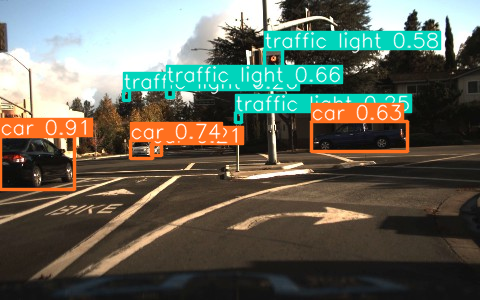

In [43]:
res_plotted = new_results[0].plot()
res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)
display(Image.fromarray(res_plotted))

In [45]:
result4 = model.predict(source="1478020264191526033.jpg",save=True, conf=0.2,iou=0.5)

res = result4[0]


image 1/1 C:\Users\dell\1478020264191526033.jpg: 416x640 1 person, 4 cars, 2 traffic lights, 1820.1ms
Speed: 6.0ms preprocess, 1820.1ms inference, 5.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


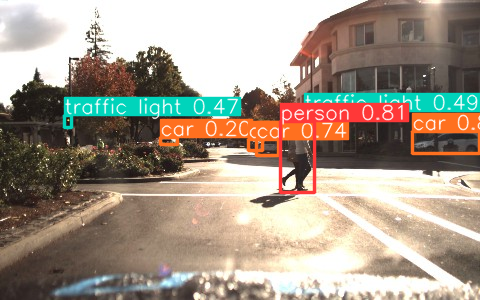

In [46]:
res_plot = result4[0].plot()
res_plot = cv2.cvtColor(res_plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(res_plot))

In [47]:
photo = model.predict(source="1478020244189375590.jpg",save=True, conf=0.2,iou=0.5)

res = photo[0]


image 1/1 C:\Users\dell\1478020244189375590.jpg: 416x640 4 cars, 1 traffic light, 870.8ms
Speed: 4.0ms preprocess, 870.8ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


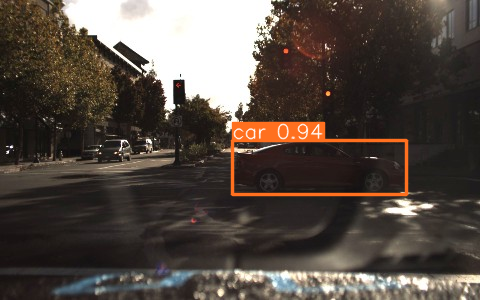

In [48]:
res_plot = res[0].plot()
res_plot = cv2.cvtColor(res_plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(res_plot))